In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import my_plot_style as mps
import numpy as np
import scipy.stats as ss
import statistics 
mps.my_plot_style()

# Descriptive statistics (using Gausssian as an example)

In [2]:
def print_stat(x):
    print('Mean:',np.mean(x))
    print('Variance:',np.var(x))
    print('standard deviation',np.std(x))
    print('Skewness:',ss.skew(x))
    print('Kurtosis:',ss.kurtosis(x,fisher=True))

In [5]:
mu = 3.5
sigma = 5
n_data = 1000
x = np.random.normal(mu,sigma,n_data)
print_stat(x)

Mean: 3.683901485498867
Variance: 24.348551985178005
standard deviation 4.934425192986312
Skewness: -0.01565655228067697
Kurtosis: -0.10001361815275178


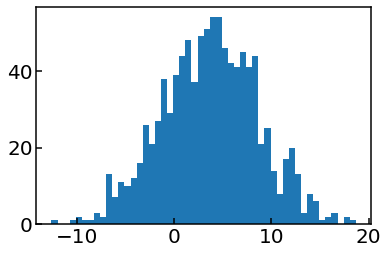

In [6]:
_ = plt.hist(x,bins=50)

# Outliers!!!

In [7]:
x = np.append(x,10000)

In [8]:
print_stat(x)

Mean: 13.670231254244623
Variance: 99751.1064778951
standard deviation 315.83398562836
Skewness: 31.579576122652846
Kurtosis: 995.5138498517465


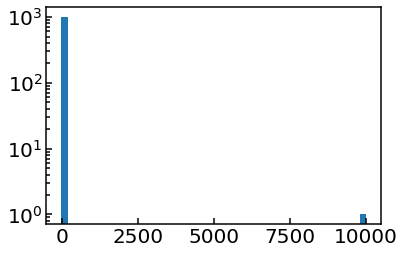

In [9]:
_ = plt.hist(x,bins=50)
plt.yscale('log')

In [10]:
def robust_location_estimator(x):
    median_x = np.median(x)
    sigma_clipping_x = np.mean(ss.sigmaclip(x,5,5)[0])
    print('Median:',median_x)
    print('Sigma clipping mean',sigma_clipping_x)

In [11]:
robust_location_estimator(x)

Median: 3.809021682581143
Sigma clipping mean 3.683901485498867


# SDSS quasar spectra practice

In [12]:
data = pf.open('SDSS_QSO_spectra_short.fits')
spectra = data[0].data # spectra[i,j] i object and j pixel
inv = data[1].data # Inverse-variance of the data
wavelength = data[2].data # wavelength 

#print(len(spectra))

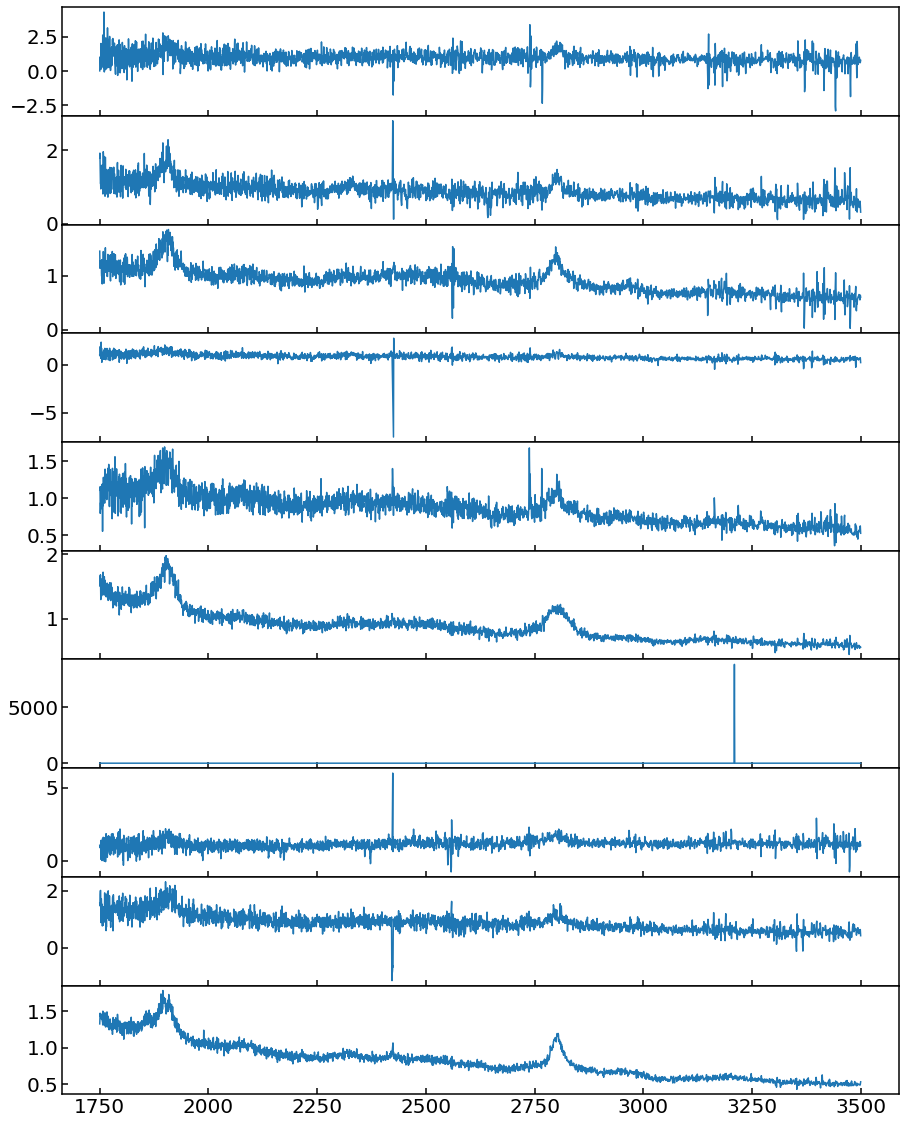

In [13]:
#len(spectra)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0)
for i in range(0,10):
    plt.subplot(10,1,i+1)
    plt.plot(wavelength,spectra[i,:])

In [14]:
def inv_weight_mean(flux, inverse_variance):
    return np.sum(flux*inverse_variance)/np.sum(inverse_variance)

In [15]:
N_pixel = len(wavelength)
mean_spectrum = np.zeros((N_pixel))
median_spectrum = np.zeros((N_pixel))
sigma_mean_spectrum = np.zeros((N_pixel))
weighted_mean_spectrum = np.zeros((N_pixel))
geometric_mean_spectrum = np.zeros((N_pixel))
for i in range(0,N_pixel):
    mean_spectrum[i]=np.mean(spectra[:,i])
    median_spectrum[i]=np.median(spectra[:,i])
    sigma_mean_spectrum[i]=np.mean(ss.sigmaclip(spectra[:,i],5,5)[0])
    weighted_mean_spectrum[i]=inv_weight_mean(spectra[:,i],inv[:,i])
    positive = np.where(spectra[:,i]>0)[0]
    geometric_mean_spectrum[i]=ss.mstats.gmean(spectra[positive,i])

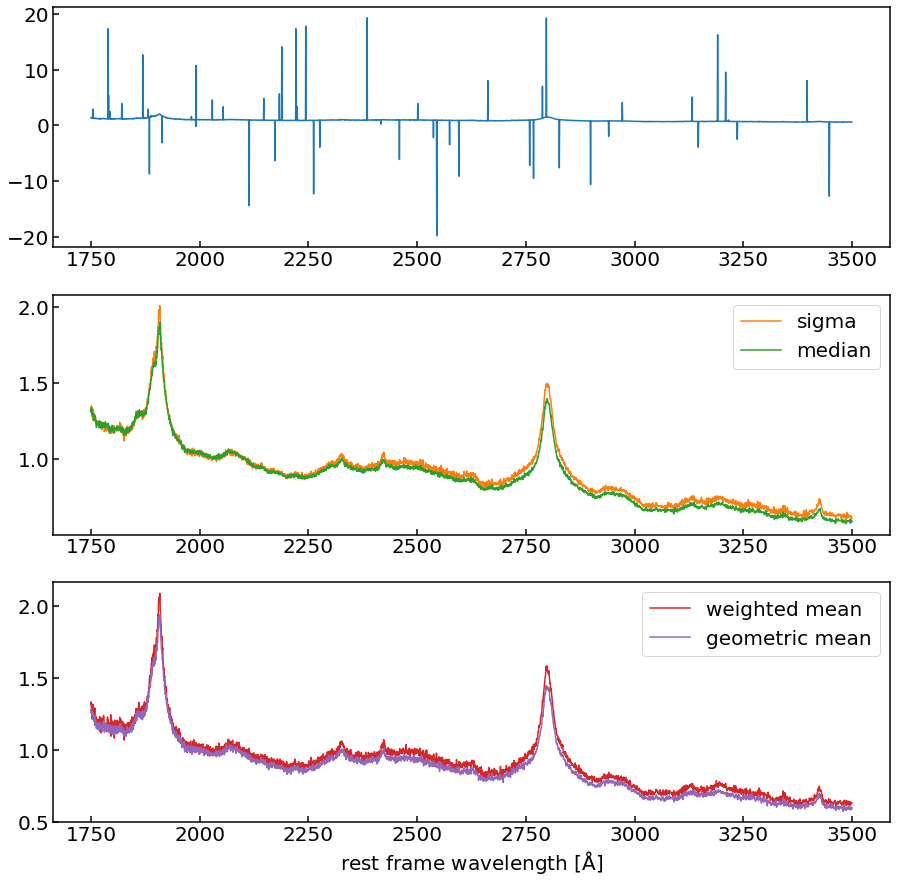

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(wavelength,mean_spectrum,c='C0')
plt.subplot(3,1,2)
plt.plot(wavelength,sigma_mean_spectrum,c='C1',label='sigma')
plt.plot(wavelength,median_spectrum,c='C2',label='median')
plt.legend()
plt.subplot(3,1,3)
plt.plot(wavelength,weighted_mean_spectrum,c='C3',label='weighted mean')
plt.plot(wavelength,geometric_mean_spectrum,c='C4',label='geometric mean')
plt.xlabel('rest frame wavelength [$\\rm \\AA$]',fontsize=20)
plt.legend()

(-0.5, 3.0)

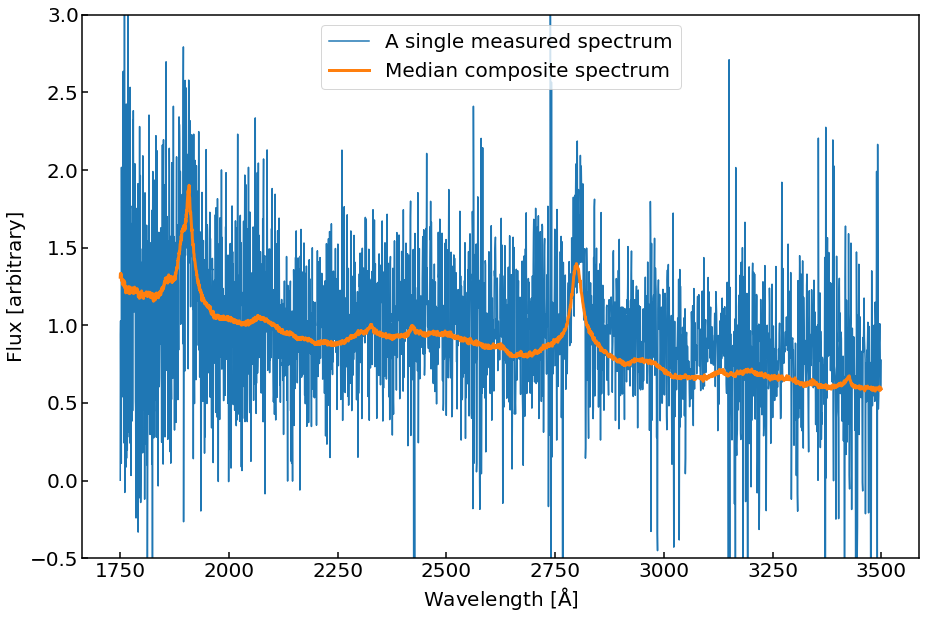

In [17]:
plt.figure(figsize=(15,10))
plt.plot(wavelength,spectra[0,:],label='A single measured spectrum')
plt.plot(wavelength,median_spectrum,c='C1',lw=3,label='Median composite spectrum')
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
plt.ylabel('Flux [arbitrary]',fontsize=20)
plt.legend()
plt.ylim(-0.5,3)

# Gaussian distribution / normal distribution

## $Prob(x) =\frac{1}{\sigma \sqrt(2\pi)} exp[-\frac{(x-\mu)^{2}}{2\sigma^{2}}]$


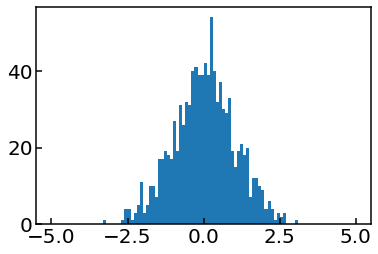

In [18]:
mu = 0
sigma = 1
n_point = 1000
random_data = np.random.normal(mu,sigma,n_point)
_ = plt.hist(random_data,bins=100,range=(-5,5))

# Location and spread

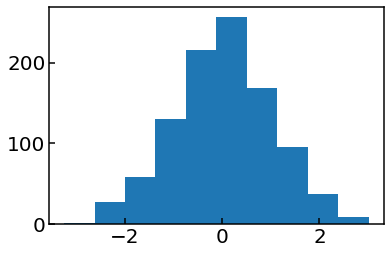

In [19]:
_ = plt.hist(random_data)

### Location estimator (discrete)
1. Average / mean         

$\overline{x} = \frac{1}{N}\sum_{i=1}^{N} x_{i} $


### Spread estimator 

1. Standard deviation $\sigma$

Variance $\sigma^{2} = \frac{1}{N-1}\sum_{i=1}^{N} (x_{i}-\overline{x})^{2}$ 

Standard deviation describes the spread of the data points. 


In [20]:
#_ = plt.hist(random_data)

mean_locataion = np.mean(random_data)
spread = np.std(random_data)
MAD = ss.median_abs_deviation(random_data)
MAD_scaled = ss.median_abs_deviation(random_data,scale='Normal')

#plt.axvline(mean_locataion,color='C1')
#plt.axvspan(mean_locataion-spread,mean_locataion+spread,color='C1',alpha=0.2)
print('Mean:',mean_locataion)
print('Standard deviation:',spread)
print('MAD:',MAD)
print('MAD scale:',MAD_scaled)
#plt.xlabel('x value',fontsize=15)
#plt.ylabel('Number of data points',fontsize=15)

Mean: 0.033636310843181076
Standard deviation: 1.010018607138387
MAD: 0.6603466058863068
MAD scale: 0.9790313428696829


### Questions

How about the uncertainty of the mean?

### Error of the mean

Error of the mean $= \frac{\sigma}{\sqrt{N}}$

mean value= 0.033636310843181076
Standard deviation= 1.010018607138387
Error of the mean= 0.03193959277708104


Text(0, 0.5, 'Number of data points')

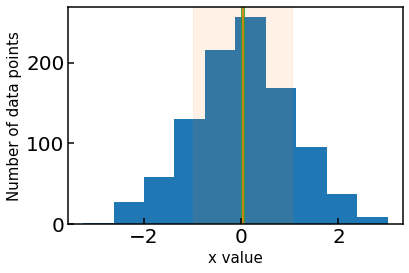

In [21]:
_ = plt.hist(random_data)

mean_locataion = np.mean(random_data)
spread = np.std(random_data)

error_of_the_mean = spread/np.sqrt(len(random_data))


plt.axvline(mean_locataion,color='C1')
plt.axvspan(mean_locataion-spread,mean_locataion+spread,color='C1',alpha=0.1)
plt.axvspan(mean_locataion-error_of_the_mean,mean_locataion+error_of_the_mean,color='C2',alpha=0.8)

print('mean value=',mean_locataion)
print('Standard deviation=',spread)
print('Error of the mean=',error_of_the_mean)
plt.xlabel('x value',fontsize=15)
plt.ylabel('Number of data points',fontsize=15)

### Exercise Two - Validating the error of the mean with the Monte Carlo method

using simuatlions to test and assess a given problem. 

In [56]:
mu = 0
sigma= 10
n_point = 1000


mean_value = np.zeros(10000)
for i_sim in range(0,10000):
    random_data2 = np.random.normal(mu,sigma,n_point)
    mean_value[i_sim]=np.mean(random_data2)

In [57]:
print('Theoretical expecations %0.3f' % (sigma/np.sqrt(n_point)))

Theoretical expecations 0.316


Standard deviation of the mean values (error of the mean)= 0.31793336290905827


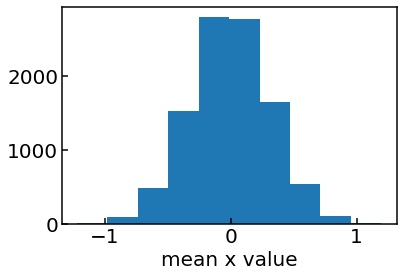

In [58]:
plt.hist(mean_value)
plt.xlabel('mean x value')
print('Standard deviation of the mean values (error of the mean)=',np.std(mean_value))

### Bootstrap uncertainty


Previously we did simulations to explore the error of the mean given that we know the underlying distribution. 
What if we have no idea about the distribution of the data. 

-> Bootstrap

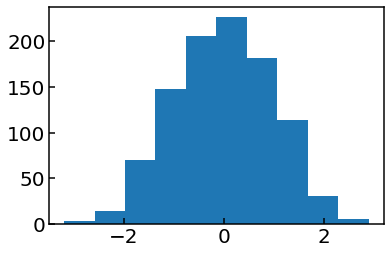

In [64]:
np.random.seed(20)

mu = 0
sigma = 1
my_data = np.random.normal(mu,sigma,1000)
x = random_data
_ = plt.hist(x)


In [65]:
#sigma/np.sqrt(len(x))

In [66]:
print('Error of the mean=',np.std(x)/np.sqrt(len(x)))

Error of the mean= 0.03107752790335104


In [67]:
x = my_data

In [68]:
bootstrap_sample_time = 200
bootstrap_mean = []
for i_boot in range(0,bootstrap_sample_time):
    random_index = np.random.randint(0,len(x),len(x)) # draw a new random sample with replacement
    new_random_sample = x[random_index]
    bootstrap_mean.append(np.mean(new_random_sample)) # here mean can change to all kinds of operation
    
bootstrap_error_of_the_mean = np.std(bootstrap_mean)

0.03133735516865853


Text(0.5, 0, 'mean(x)')

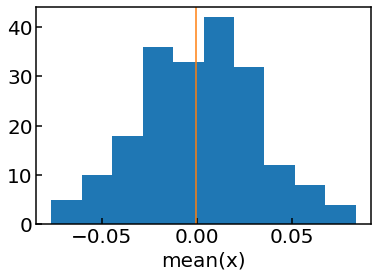

In [69]:
plt.hist(bootstrap_mean)
plt.axvline(np.mean(random_data),color='C1')
print(np.std(bootstrap_mean))
plt.xlabel('mean(x)')

# Bootstrapping
### Validating bootstrap uncertainty against simulations

In [70]:
bootstrap_time_list = np.arange(10,1000,1)
error_mean_list = np.zeros(len(bootstrap_time_list))
for i_list in range(0,len(bootstrap_time_list)):

    Bootstrap_time = bootstrap_time_list[i_list]
    mean_values_boot = np.zeros(Bootstrap_time)
    for i_boot in range(0,Bootstrap_time):
        random_index = np.random.randint(0,len(x),len(x))
        mean_values_boot[i_boot]=np.mean(x[random_index])
        # Here you can change mean to any function or operation, no matter how complicated it is. 
        
    error_mean_list[i_list]=np.std(mean_values_boot)

Text(0.5, 0, 'Bootstrapping time')

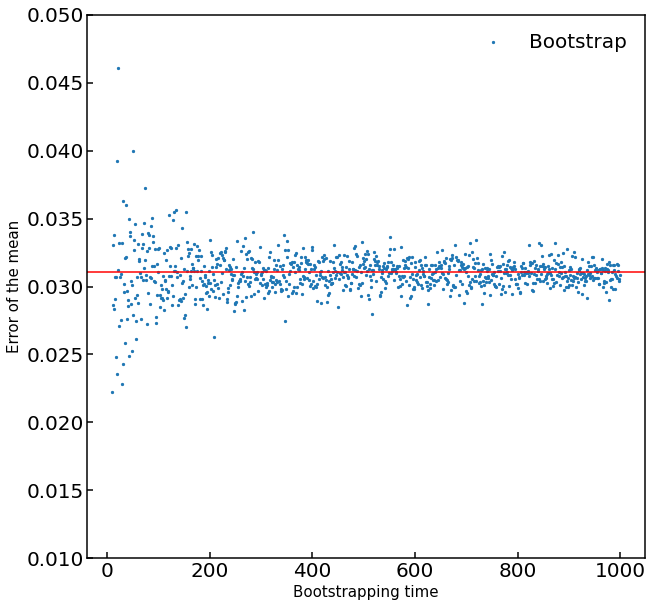

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(bootstrap_time_list,error_mean_list,s=5,label='Bootstrap',alpha=1)
plt.axhline(np.std(random_data)/np.sqrt(len(random_data)),color='r')
plt.ylim(0.01,0.05)
plt.legend(frameon=False)
plt.ylabel('Error of the mean',fontsize=15)
plt.xlabel('Bootstrapping time',fontsize=15)

# Why is Gaussian distribution important?

# Central limit theorem

### The distribution of the mean value of a sample draw from most of distributions follows gaussian distribution. 

98.45281784407588
Error of the mean= 3.1133514644894795


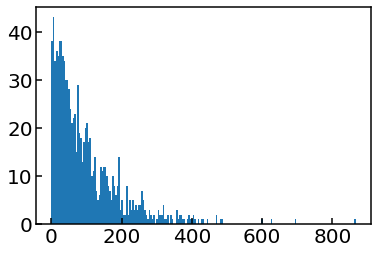

In [72]:
test_sample = np.random.gamma(1.,100,1000)
sigma = np.std(test_sample)
error_mean = sigma/np.sqrt(len(test_sample))
print(sigma)
print('Error of the mean=',error_mean)
_ = plt.hist(test_sample,bins=200)
#plt.

In [73]:
mean_value = np.zeros(5000)
for i_sim in range(0,5000):
    random_data2 = np.random.gamma(1,100,1000)
    mean_value[i_sim]=np.mean(random_data2)

In [74]:
#print(np.mean(random_data2))
#print(np.median(random_data2))

Standard deviation of the mean values= 3.100374562050398


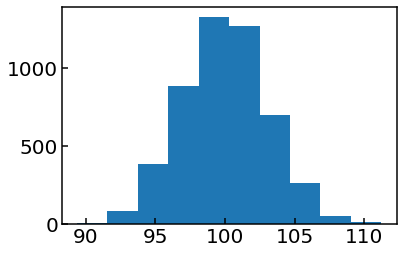

In [75]:
plt.hist(mean_value)
print('Standard deviation of the mean values=',np.std(mean_value))

In [76]:
data_n = (10**np.arange(1,5,0.5)).astype(int)
uncertainty_n = np.zeros(len(data_n))
for i_data in range(0,len(data_n)):
    mean_value = np.zeros(1000)
    for i_sim in range(0,1000):
        random_data2 = np.random.gamma(1,100,data_n[i_data])
        mean_value[i_sim]=np.mean(random_data2)
    
    uncertainty_n[i_data]=np.std(mean_value)

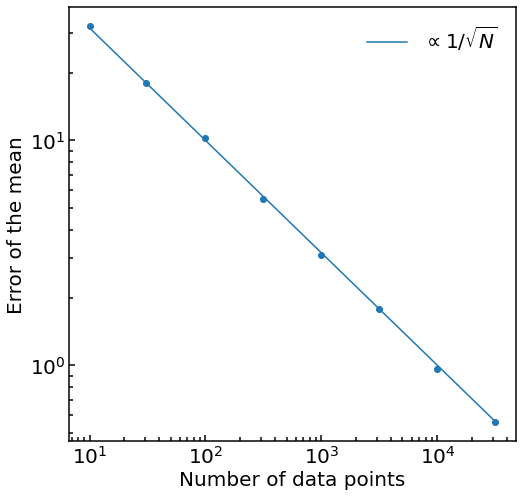

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(data_n,uncertainty_n)
plt.yscale('log')
plt.xscale('log')
plt.plot(data_n,100/np.sqrt(data_n),label='$\\propto 1/\sqrt{N}$')
plt.ylabel('Error of the mean')
plt.xlabel('Number of data points')
plt.legend(frameon=False,fontsize=20)
#print(np.mean(data_n))

1. Because of the central limit theorem, if you are measuring an average quantity, most of the times you can assume the distribution of the average quantity is gaussian. 

2. The power of the gaussian distribution is that the uncertainty of the mean scales with $1/\sqrt N$ (N is the number of data points). It means that if you can collect 100 times more data, the precision of your measurements will be 10 times better. 

-> The reason that scientists always want to  increase the sample size. But, on the other hand, if your new observations can only increase the sample size by a factor 2, the precision of your measurements will only increase by ~1.4, which might not gain much depending on your scientific questions. So always think about the sample size of your experiments and you will need a good justification for your proposed observations. 

-------------------------------------------

# Intrinsic scattering vs uncertainty

In [171]:
y = np.random.normal(5,5,100)
x = np.arange(0,len(y))*0.0+np.random.normal(0,0.01,len(y))
yerr = 5

Standard deviation of y 5.238296185223826
Typical error of y data point 5


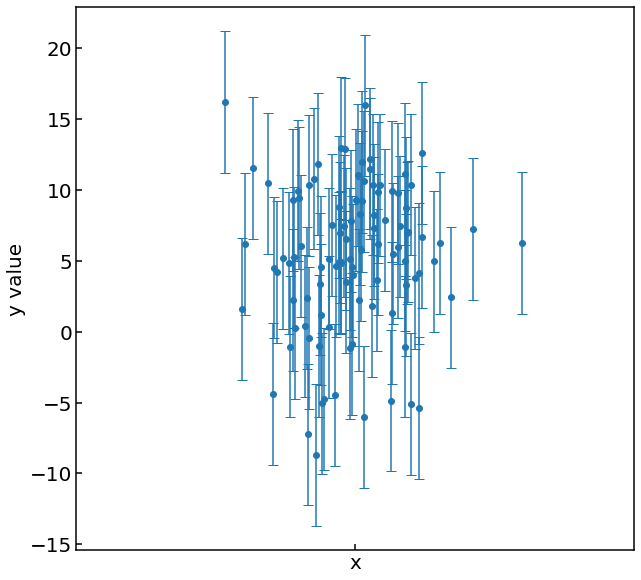

In [179]:
plt.figure(figsize=(10,10))
plt.errorbar(x,y,yerr=yerr,ls='',marker='o',capsize=5)
plt.xlim(-0.05,0.05)
plt.ylabel('y value')
plt.xticks([0],'x')
print('Standard deviation of y',np.std(y))
print('Typical error of y data point',yerr)

In [182]:
y = np.random.normal(5,5,100)
x = np.arange(0,len(y))*0.0+np.random.normal(0,0.01,len(y))
yerr = 2

Standard deviation of y 5.048917869969319
Typical error of y data point 2


Text(0.5, 1.0, 'Intrinsic scattering')

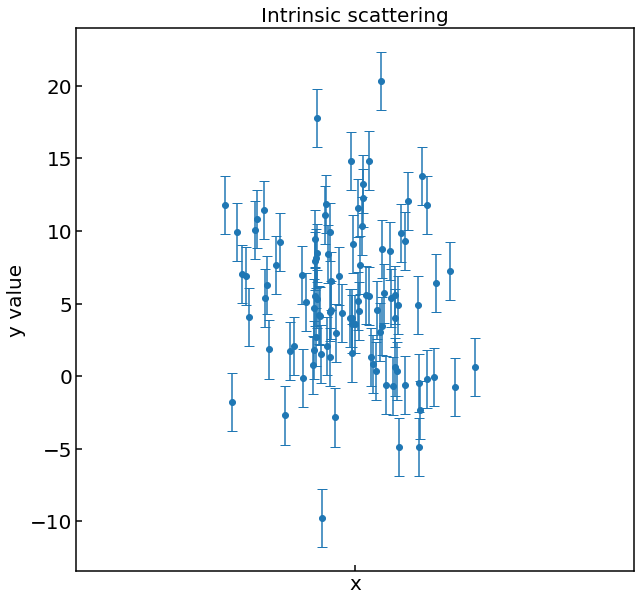

In [203]:
plt.figure(figsize=(10,10))
plt.errorbar(x,y,yerr=yerr,ls='',marker='o',capsize=5)
plt.xlim(-0.05,0.05)
plt.ylabel('y value')
plt.xticks([0],'x')
print('Standard deviation of y',np.std(y))
print('Typical error of y data point',yerr)
plt.title('Intrinsic scattering')